 # Customer Segmentation using KMEANS CLUSTERING

### Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Acquisition


In [6]:
customer_df = pd.read_csv("./Mall_Customers.csv")
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_df.shape

(200, 5)

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
X = customer_df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
#import the sklearn library
from sklearn.cluster import KMeans

### Using the Elbow Method to get the number of cluster patterns in this data

In [12]:
wcss = []

In [13]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init='k-means++' , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[269981.28,
 185917.1425392852,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38858.95997514391,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156]

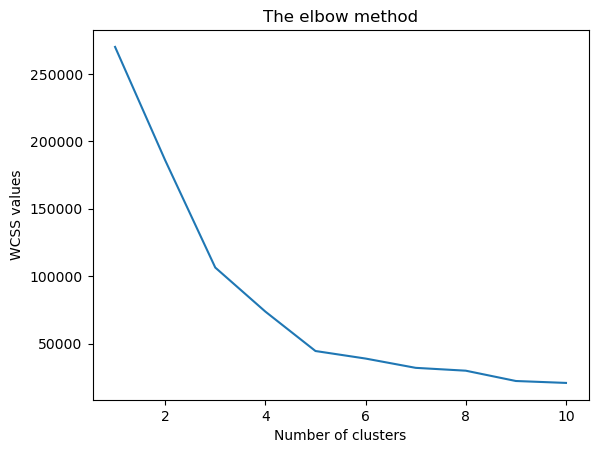

In [15]:
# create a visualization plot to show the number of clusters
plt.plot(range(1,11) , wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")
plt.show()


In [16]:
kmeansmodel = KMeans(n_clusters = 5 , init='k-means++' , random_state = 0)

In [17]:
y_kmeans = kmeansmodel.fit_predict(X)

In [18]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

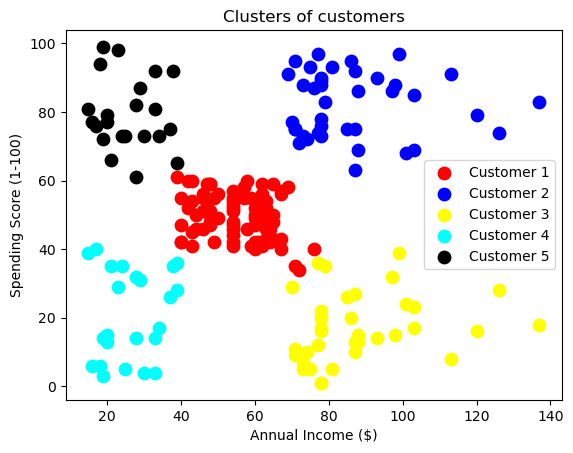

In [19]:
# Visualize the customer's segments

plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0,1] , s=80 , c="red" , label = "Customer 1")
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1,1] , s=80 , c="blue" , label = "Customer 2")
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2,1] , s=80 , c="yellow" , label = "Customer 3")
plt.scatter(X[y_kmeans == 3,0] , X[y_kmeans == 3,1] , s=80 , c="cyan" , label = "Customer 4")
plt.scatter(X[y_kmeans == 4,0] , X[y_kmeans == 4,1] , s=80 , c="black" , label = "Customer 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## Assignment One

1. Who spends more ( Based on Gender)
2. What Category of Age spends the most

#### Evaluation of KMeans Clustering

#### Silhouette Analysis 

This can be used to determine the degree of seperation between clusters.

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
# Calculate the silhouette_score
silhouette_avg = silhouette_score(X , y_kmeans)
print("Silhouette_score :" , silhouette_avg)

Silhouette_score : 0.553931997444648


In [26]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
import numpy as np

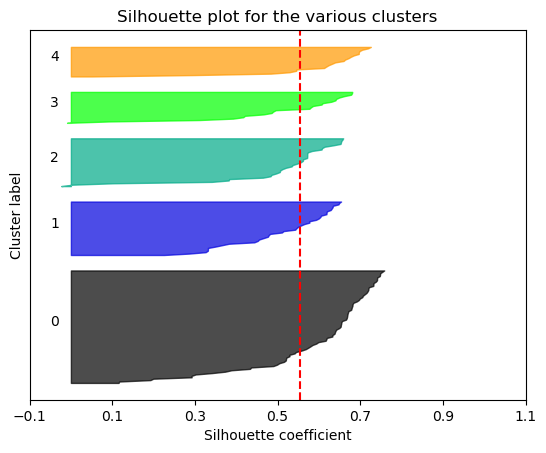

In [27]:
# Calculate silhouette scores for each sample

silhouette_values  = silhouette_samples(X , y_kmeans)


fig , ax = plt.subplots()


y_lower = 10 

for i in range(kmeansmodel.n_clusters):

    ith_cluster_silhouette_values =  silhouette_values[y_kmeans == i]

    ith_cluster_silhouette_values.sort()


    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / kmeansmodel.n_clusters)

    ax.fill_betweenx(np.arange(y_lower , y_upper),
                    0 , ith_cluster_silhouette_values,
                    facecolor=color , edgecolor=color , alpha=0.7)
    ax.text(-0.05 , y_lower + 0.5 * size_cluster_i , str(i))

    y_lower = y_upper + 10


ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")

ax.axvline(x = silhouette_avg , color="red" , linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()


#### Hierarchical Clustering

##### Agglomerative Clustering
##### Divisive Clustering


### Using the same data for Hierarchical Clustering

In [31]:
datasubset = customer_df.loc[:, ["Age" , "Annual Income (k$)"]]
datasubset

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


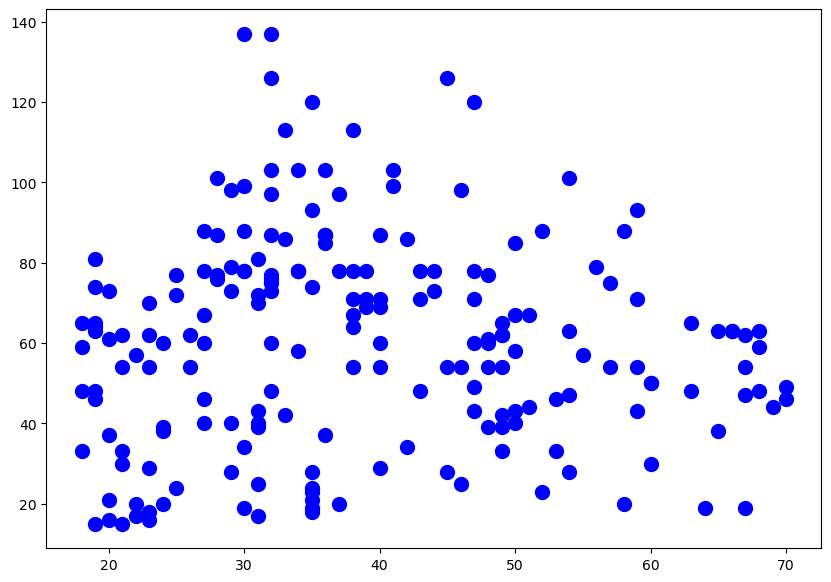

In [32]:
plt.figure(figsize = (10 , 7))
plt.scatter(datasubset[["Age"]] , datasubset[["Annual Income (k$)"]] , s = 100 , c = "blue")

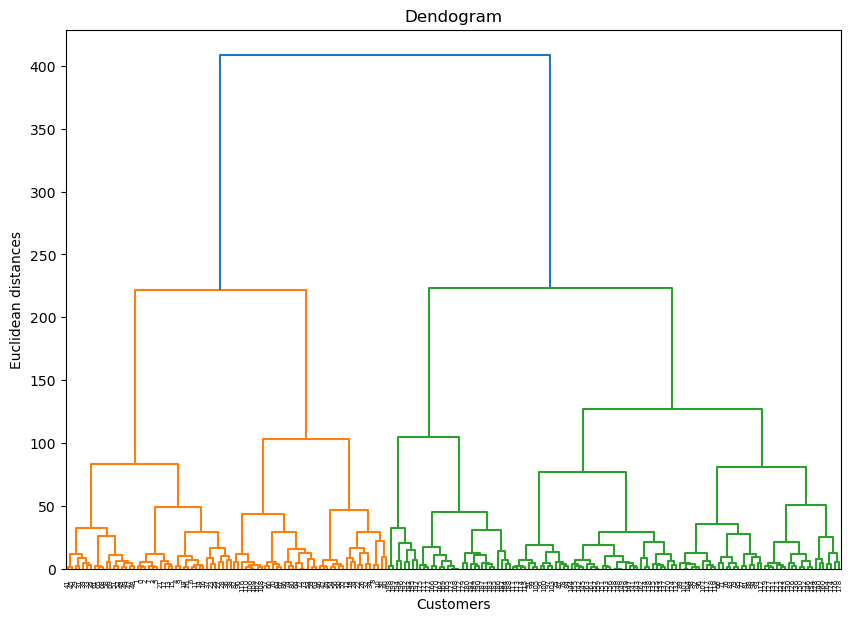

In [33]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (10 , 7))


dendogram = sch.dendrogram(sch.linkage(datasubset , method  = "ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()
          
                          

In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2 , linkage = "ward")
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
cl = cluster.fit_predict(datasubset)

In [36]:
silhouette_score(datasubset , cl) 

0.4104652474372429

In [37]:
X = datasubset.values

In [38]:
X[0:6]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17],
       [22, 17]])

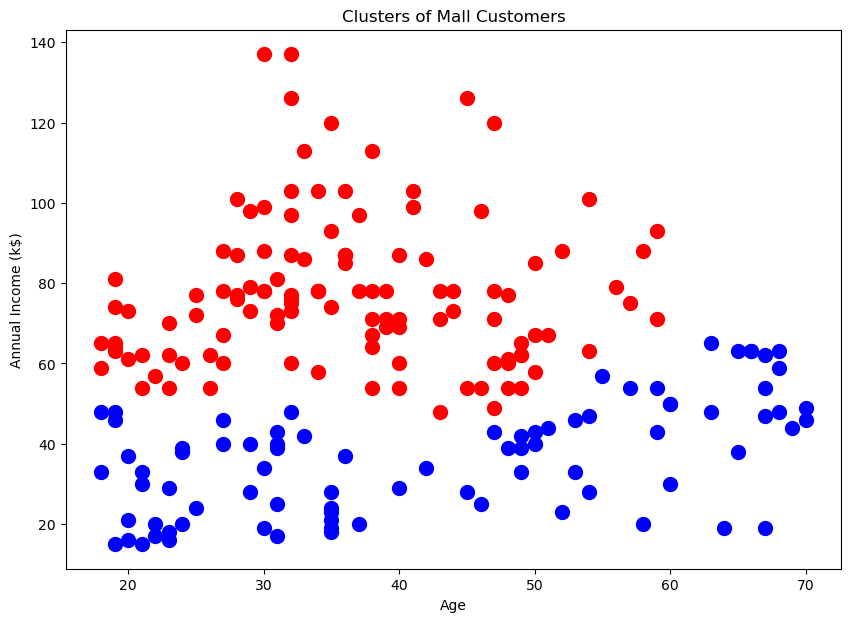

In [39]:
plt.figure(figsize = (10,7))
plt.scatter(X[cl == 0,0] , X[cl == 0,1] , s = 100 , c = 'red' , label = 'Cluster1')
plt.scatter(X[cl == 1,0] , X[cl == 1,1] , s = 100 , c = 'blue' , label = 'Cluster2')
plt.title("Clusters of Mall Customers")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

# DBSCAN CLUSTERING

In [70]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors =2)
nbrs = neigh.fit(X)
distances , indices =nbrs.kneighbors(X)

In [72]:
distances

array([[0.        , 1.41421356],
       [0.        , 1.41421356],
       [0.        , 1.41421356],
       [0.        , 1.41421356],
       [0.        , 2.23606798],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 3.        ],
       [0.        , 2.23606798],
       [0.        , 3.        ],
       [0.        , 1.        ],
       [0.        , 6.08276253],
       [0.        , 2.        ],
       [0.        , 2.23606798],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.23606798],
       [0.        , 5.38516481],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 4.12310563],
       [0.        , 3.16227766],
       [0.        , 3.60555128],
       [0.        , 5.09901951],
       [0.        , 3.60555128],
       [0.        , 3.16227766],
       [0.        , 4.        ],
       [0.        , 5.09901951],
       [0.        , 2.23606798],
       [0.

In [74]:
indices

array([[  0,   2],
       [  1,   2],
       [  2,   0],
       [  3,   5],
       [  4,   9],
       [  5,   3],
       [  6,  11],
       [  7,   5],
       [  8,  10],
       [  9,   4],
       [ 10,   8],
       [ 11,   6],
       [ 12,   8],
       [ 13,  15],
       [ 14,  11],
       [ 15,  13],
       [ 16,  19],
       [ 17,  15],
       [ 18,  24],
       [ 19,  20],
       [ 20,  19],
       [ 21,  13],
       [ 22,  26],
       [ 23,  25],
       [ 24,  32],
       [ 25,  23],
       [ 26,  22],
       [ 27,  20],
       [ 28,  26],
       [ 29,  31],
       [ 30,  24],
       [ 31,  29],
       [ 32,  34],
       [ 33,  35],
       [ 34,  32],
       [ 35,  33],
       [ 36,  28],
       [ 37,  43],
       [ 38,  43],
       [ 39,  35],
       [ 40,  57],
       [ 41,  45],
       [ 42,  44],
       [ 43,  49],
       [ 44,  42],
       [ 45,  41],
       [ 46,  44],
       [ 47,  48],
       [ 48,  49],
       [ 49,  43],
       [ 50,  54],
       [ 51,  52],
       [ 52,

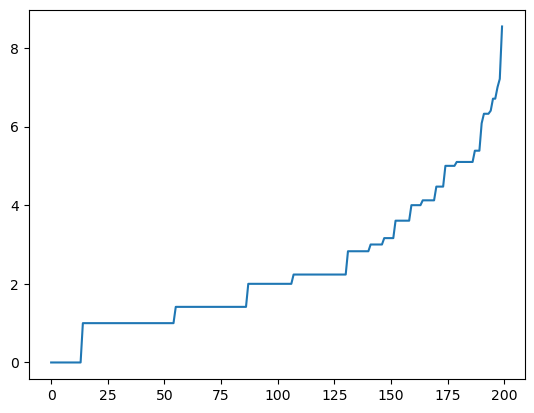

In [76]:
distances = np.sort(distances , axis = 0)
distances = distances[: , 1]
plt.plot(distances)

In [78]:
from sklearn.cluster import DBSCAN

dbscancluster = DBSCAN(eps=7 , min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [82]:
len(set(clusters))

3

In [84]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  1,  0, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,
        1,  0,  0,  0,  0,  0, -1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [90]:
silhouette_score(X, clusters)

0.28705019416571775